<a href="https://colab.research.google.com/github/hibatallahk/WebScrapping/blob/main/webTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indeed Job Scraper

create a general purpose job scraper

In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup

In [2]:
def get_url(position, location):
    """Generate url from position and location"""
    template = 'https://ma.indeed.com/jobs?q={}&l={}'   
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url

In [3]:
url = get_url('data scientist', 'Maroc')
print(url)

https://ma.indeed.com/jobs?q=data+scientist&l=Maroc


# Extract html data


In [4]:
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
cards = soup.find_all('div', 'slider_container')

In [7]:
len(cards)

15

# Prototype the model with a single record


In [8]:
#ok
card = cards[1]
card

<div class="slider_container"><div class="slider_list"><div class="slider_item"><div class="job_seen_beacon"><table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation"><tbody><tr><td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-color-purple"><span title="Data Scientist-(H/F)">Data Scientist-(H/F)</span></h2></div><div class="heading6 company_location tapItem-gutter"><pre><span class="companyName"><a class="turnstileLink companyOverviewLink" data-tn-element="companyName" href="/cmp/Soci%C3%A9t%C3%A9-G%C3%A9n%C3%A9rale-1" rel="noopener" target="_blank">Société Générale</a></span><span class="ratingsDisplay withRatingLink"><a class="ratingLink" data-tn-variant="cmplinktst2" href="/cmp/Soci%C3%A9t%C3%A9-G%C3%A9n%C3%A9rale-1/reviews" rel="noopener" target="_blank" title="Société Générale reviews"><span aria-label="3,9 of stars rating" class="ratingNumber" role="img"><span aria-hidden="t

In [9]:
#ok
job_title = card.h2.span.get('title')
job_title

'Data Scientist-(H/F)'

In [10]:
#ok
#company = card.div.div.div.table.tbody.tr.td.div.get('companyName')
company = card.find('span', 'companyName').text
company

'Société Générale'

In [11]:
#ok
location = card.find('div', 'companyLocation').text
location

'Maroc'

In [12]:
#ok
job_summary = card.find('div', 'job-snippet').text.strip().replace('\n', ' ')
job_summary

'Développer des use cases de bout en bout, en collaboration avec la Digital Factory ainsi que les lignes métiers.'

In [13]:
#ok
post_date = card.find('span', 'date').text
post_date

'Postedil y a 30+ jours'

In [14]:
#ok
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-12-24'

In [15]:
#job_url = 'https://www.indeed.com' + card.h2.a.get('href')

url = card.a.get('href')
job_url = 'https://ma.indeed.com' + url
job_url

'https://ma.indeed.com/cmp/Soci%C3%A9t%C3%A9-G%C3%A9n%C3%A9rale-1'

# Generalize the code

In [16]:
def get_record(card):
    """Extract job data from a single record"""
    job_title = card.h2.span.get('title')
    #company = card.find('span', 'companyName').text.strip()
    location = card.find('div', 'companyLocation').text.strip()
    try:
      company = card.find('span', 'companyName').text.strip()
    except:
      company = ' '
    post_date = card.find('span', 'date').text.strip()
    today = datetime.today().strftime('%Y-%m-%d')
    job_summary = card.find('div', 'job-snippet').text.strip().replace('\n', ' ')
    record = (job_title, location, company, post_date, today, job_summary)

    return record

In [17]:
records = []

for card in cards:
    record = get_record(card)
    records.append(record)

In [18]:
records[1]

('Data Scientist-(H/F)',
 'Maroc',
 'Société Générale',
 'Postedil y a 30+ jours',
 '2021-12-24',
 'Développer des use cases de bout en bout, en collaboration avec la Digital Factory ainsi que les lignes métiers.')

#Getting the next page

In [20]:
url = 'https://ma.indeed.com' + soup.find('a',{'aria-label':'Suivant'}).get('href')

In [21]:
url

'https://ma.indeed.com/jobs?q=data+scientist&l=Maroc&start=10'

In [22]:
while True:
    try:
        url = 'https://ma.indeed.com' + soup.find('a',{'aria-label':'Suivant'}).get('href')
    except AttributeError:
        break

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    cards = soup.find_all('div', 'job_seen_beacon')

    for card in cards:
        record = get_record(card)
        records.append(record)

In [23]:
len(records)

78

# Putting all together

In [43]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup


def get_url(position, location):
    """Generate url from position and location"""
    template = 'https://ma.indeed.com/jobs?q={}&l={}'   
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url


def get_record(card):
    """Extract job data from a single record"""
    job_title = card.h2.span.get('title')
    location = card.find('div', 'companyLocation').text.strip()
    try:
      company = card.find('span', 'companyName').text.strip()
    except:
      company = ' '
    job_summary = card.find('div', 'job-snippet').text.strip().replace('\n', ' ')
    post_date = card.find('span', 'date').text.strip()
    today = datetime.today().strftime('%Y-%m-%d')
    job_url = 'https://ma.indeed.com' + card.a.get('href')

    record = (job_title, location, post_date, today, job_summary)

    return record


def main(position, location):
    """Run the main program routine"""
    records = []
    url = get_url(position, location)
    
    # extract the job data
    while True:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'job_seen_beacon')
        for card in cards:
            record = get_record(card)
            records.append(record)
        try:
            url = 'https://ma.indeed.com' + soup.find('a',{'aria-label':'Suivant'}).get('href')
        except AttributeError:
            break
        
    # save the job data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['JobTitle','Location', 'PostDate', 'ExtractDate', 'Summary'])
        writer.writerows(records)

In [44]:
main('data scientist', 'Maroc')

### Conclusion

- Ici, on a pu extraire les offres publiés, pour l'instant ces données sont brutes. Dans la prochaines parties, on va uniformiser nos données, afin de les visualiser et analyser les tendances.

# NLP and ML Analysis Part

In [34]:
!pip3 install transformers

In [35]:
import math
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# install wordcloud
#!pip install wordcloud 
import lightgbm as lgb

# import PyTorch and transformers libraries
import torch
import transformers

# import package and its set of stopwords
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler # for normalizing data

# import metrics
from sklearn import metrics
from sklearn.metrics import f1_score, precision_recall_curve

# import machine learning models
from sklearn.dummy import DummyClassifier # dummy classifier
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.naive_bayes import MultinomialNB # naive bayes classifier
from lightgbm import LGBMClassifier # lightGBM classifier
from sklearn.linear_model import SGDClassifier # stochastic gradient classifier

import sys
import warnings # ignore warnings
warnings.filterwarnings("ignore")

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [45]:
df = pd.read_csv('results.csv', sep=',')

In [46]:
df.head(50)

,JobTitle,Location,PostDate,ExtractDate,Summary
0,Stage en Ingénieur Développement – Data Scient...,Maroc,Postedil y a 30+ jours,2021-12-24,Poste pour Ingénieur à Rabat – Offre d’Emploi ...
1,Data Scientist-(H/F),Maroc,Postedil y a 30+ jours,2021-12-24,"Développer des use cases de bout en bout, en c..."
2,Data Scientist (H/F),Casablanca,Postedil y a 30+ jours,2021-12-24,Exploration des données à l’aide d’outils de D...
3,Data Scientist H/F,Casablanca,Postedil y a 30+ jours,2021-12-24,Mesurer et étudie les indicateurs de pilotage ...
4,Senior Data Scientist - Advanced Analytics,Casablanca,Postedil y a 30+ jours,2021-12-24,"Experience in data extraction, transformation,..."
5,المكتب الشريف للفوسفاط: توظيفات مهمة أطر ومهند...,Maroc,Postedil y a 30+ jours,2021-12-24,"As a senior data scientist, you will work clos..."
6,Junior data scientist,Casablanca,Postedil y a 30+ jours,2021-12-24,Mettre en œuvre les processus de structuration...
7,Data Scientist,Casablanca,Postedil y a 30+ jours,2021-12-24,Le Data Scientist aura comme principale missio...
8,المكتب الشريف للفوسفاط : عملية توظيف لحاملي ال...,Maroc,Postedil y a 30+ jours,2021-12-24,المكتب الشريف للفوسفاط : عملية توظيف لحاملي ال...
9,Ingénieur data scientist.,Casablanca,Postedil y a 30+ jours,2021-12-24,Vous connaissez les meilleures pratiques du dé...


In [47]:

df.head()

,JobTitle,Location,PostDate,ExtractDate,Summary
0,Stage en Ingénieur Développement – Data Scient...,Maroc,Postedil y a 30+ jours,2021-12-24,Poste pour Ingénieur à Rabat – Offre d’Emploi ...
1,Data Scientist-(H/F),Maroc,Postedil y a 30+ jours,2021-12-24,"Développer des use cases de bout en bout, en c..."
2,Data Scientist (H/F),Casablanca,Postedil y a 30+ jours,2021-12-24,Exploration des données à l’aide d’outils de D...
3,Data Scientist H/F,Casablanca,Postedil y a 30+ jours,2021-12-24,Mesurer et étudie les indicateurs de pilotage ...
4,Senior Data Scientist - Advanced Analytics,Casablanca,Postedil y a 30+ jours,2021-12-24,"Experience in data extraction, transformation,..."


In [48]:
df.isna().sum()

JobTitle       1
Location       0
PostDate       0
ExtractDate    0
Summary        0
dtype: int64

In [49]:
df.duplicated().sum()

3

In [50]:
df['Location'].value_counts()

Maroc                 35
Casablanca            33
Rabat                  4
Tanger                 1
Salé                   1
Casablanca+ 1 lieu     1
Agadir                 1
Settat                 1
Témara                 1
Name: Location, dtype: int64

- On s'interesse plus aux colomnes `job_title` et `Summary`

In [71]:
df.describe()

,id_job,NbrOfDays,year,month,day
count,77.000000,77.000000,77.0,77.000000,77.00000
mean,38.000000,29.012987,2021.0,11.090909,22.25974
std,22.371857,3.408555,0.0,0.289365,5.83186
min,0.000000,9.000000,2021.0,11.000000,1.00000
25%,19.000000,30.000000,2021.0,11.000000,24.00000
50%,38.000000,30.000000,2021.0,11.000000,24.00000
75%,57.000000,30.000000,2021.0,11.000000,24.00000
max,76.000000,30.000000,2021.0,12.000000,26.00000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_job       77 non-null     int64         
 1   JobTitle     77 non-null     object        
 2   Location     77 non-null     object        
 3   PostDate     77 non-null     object        
 4   ExtractDate  77 non-null     datetime64[ns]
 5   Summary      77 non-null     object        
 6   NbrOfDays    77 non-null     int64         
 7   PostedDate   77 non-null     datetime64[ns]
 8   year         77 non-null     int64         
 9   month        77 non-null     int64         
 10  day          77 non-null     int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 6.7+ KB


In [73]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [74]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

In [76]:
!pip install wordcloud

In [77]:
import nltk
from nltk.corpus import stopwords

# EDA

In [51]:
#drop na
df.dropna(inplace = True)

**First, let's convert the `PostDate`**

In [52]:
df['NbrOfDays'] = df.PostDate.str.extract('(\d+)')

In [53]:
df['NbrOfDays'].value_counts()

30    69
23     4
16     1
19     1
9      1
28     1
Name: NbrOfDays, dtype: int64

In [54]:
df['Location'].value_counts()

Maroc                 35
Casablanca            33
Rabat                  4
Salé                   1
Casablanca+ 1 lieu     1
Agadir                 1
Settat                 1
Témara                 1
Name: Location, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_job       77 non-null     int64         
 1   JobTitle     77 non-null     object        
 2   Location     77 non-null     object        
 3   PostDate     77 non-null     object        
 4   ExtractDate  77 non-null     datetime64[ns]
 5   Summary      77 non-null     object        
 6   NbrOfDays    77 non-null     int64         
 7   PostedDate   77 non-null     datetime64[ns]
 8   year         77 non-null     int64         
 9   month        77 non-null     int64         
 10  day          77 non-null     int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 6.7+ KB


In [55]:
df.NbrOfDays = df.NbrOfDays.astype('int64')

In [56]:
df['ExtractDate'] = df['ExtractDate'].astype('datetime64')

In [57]:
from datetime import datetime, timedelta

df['PostedDate'] = df['ExtractDate'] -  pd.to_timedelta(df['NbrOfDays'], unit='d')

In [58]:
df.head()

,JobTitle,Location,PostDate,ExtractDate,Summary,NbrOfDays,PostedDate
0,Stage en Ingénieur Développement – Data Scient...,Maroc,Postedil y a 30+ jours,2021-12-24,Poste pour Ingénieur à Rabat – Offre d’Emploi ...,30,2021-11-24
1,Data Scientist-(H/F),Maroc,Postedil y a 30+ jours,2021-12-24,"Développer des use cases de bout en bout, en c...",30,2021-11-24
2,Data Scientist (H/F),Casablanca,Postedil y a 30+ jours,2021-12-24,Exploration des données à l’aide d’outils de D...,30,2021-11-24
3,Data Scientist H/F,Casablanca,Postedil y a 30+ jours,2021-12-24,Mesurer et étudie les indicateurs de pilotage ...,30,2021-11-24
4,Senior Data Scientist - Advanced Analytics,Casablanca,Postedil y a 30+ jours,2021-12-24,"Experience in data extraction, transformation,...",30,2021-11-24


- Let's add an index to our dataframe

In [59]:
df = df.reset_index()
df = df.rename(columns={"index":"id_job"})
df['id_job'] = df.index + 0

- Extract month/day/year from `PostedDate`

In [60]:
df['year'] = pd.DatetimeIndex(df['PostedDate']).year
df['month'] = pd.DatetimeIndex(df['PostedDate']).month
df['day'] = pd.DatetimeIndex(df['PostedDate']).day

- Let's check how many different jobs posted over days.

In [61]:
def clean_data(data):
    ''' 
    this function is used to clean 
    the data of non standard characters
    '''
    clean_data = re.sub(r"[^a-zA-Zéèàêâûù']", " ", data)
    clean_data = " ".join(clean_data.split())
    return clean_data.lower()
df['Summary'] = df['Summary'].apply(clean_data)
df['Summary'].head()

0    poste pour ingénieur à rabat offre d emploi st...
1    développer des use cases de bout en bout en co...
2    exploration des données à l aide d outils de d...
3    mesurer et étudie les indicateurs de pilotage ...
4    experience in data extraction transformation c...
Name: Summary, dtype: object

In [62]:
df['Summary'].tail(20)

57    analyste p le data h f cedoc computer science ...
58    nous cherchons des développeurs python django ...
59    vous maitrisez les différentes méthodologies d...
60    chef de département data management h f phd st...
61    nous sommes à la recherche de candidat es ayan...
62    ingénieur big data spark scala phd student in ...
63    the digital product manager will oversee the d...
64    secteur d'activité informatique fonction infor...
65    travailler en collaboration avec des experts e...
66    effective utilisation of data and crm database...
67    together with your team of creative product ma...
68    collection storage and interpretation of data ...
69    nous cherchons pour notre entité agriedge de l...
70    teleperformance recrute un data scientist ja i...
71    vous ma trisez l ensemble des solutions techni...
72    secteur d'activité automobile motos cycles fon...
73    as a data scientist you are tasked with enabli...
74    expert des ressources en eau poste proposé

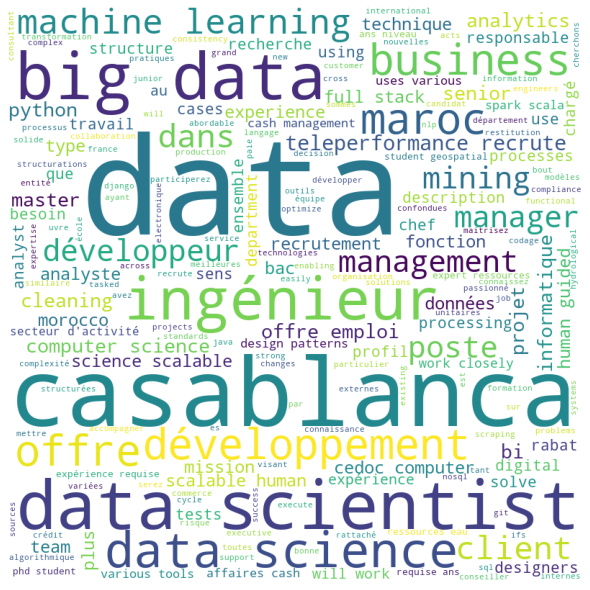

In [63]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
# Reads 'Youtube04-Eminem.csv' file
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['pour', 'à', 'd','et', 'du', 'en','ou','vous','une','un', 'product','la','le', 'des', 'les', 'nous', 'as','a', 'de', 'l', 'nos', 'notre', 'avec', 'afin', 'are'])


 
# iterate through the csv file
for val in df.Summary:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [64]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [66]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tag.brill import Pos
#import stopwords with nltk
nltk.download('stopwords')
is_noun = lambda pos: pos[:2] == 'NN'
from nltk.corpus import stopwords
stop = stopwords.words('english')
wordnet_lemma = WordNetLemmatizer()
lemmas = []
words_categories = []
nouns = []
for text in df['Summary']:
    words = nltk.word_tokenize(text)
    lemmas += ([wordnet_lemma.lemmatize(w, pos = 'n') for w in words if w not in (stop)])
    words_categories = Counter(lemmas).keys()

for i in nltk.pos_tag(words_categories):
    if i[1] == 'NN':
        nouns.append(i[0])
print(nouns)
#print(words_categories)              
#print(lemmas)
#print(Counter(lemmas))
#print(words_categories)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['poste', 'ingénieur', 'rabat', 'offre', 'emploi', 'stage', 'développement', 'scientist', 'cadre', 'use', 'case', 'collaboration', 'avec', 'la', 'factory', 'ainsi', 'que', 'ligne', 'exploration', 'données', 'l', 'aide', 'discovery', 'qliksense', 'restitution', 'analysis', 'réalisées', 'mesurer', 'pilotage', 'risque', 'cdl', 'provisionnement', 'ecl', 'pd', 'lgd', 'rwa', 'extraction', 'transformation', 'validation', 'science', 'model', 'production', 'work', 'team', 'designer', 'engineer', 'project', 'business', 'mettre', 'processus', 'source', 'organisation', 'travail', 'aura', 'comme', 'mission', 'gérer', 'structurées', 'ou', 'machine', 'crée', 'emplois', 'directement', 'recrutant', 'l

In [67]:
from collections import Counter

# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(comment_words)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

wordfreq = list(word_freq.items())[:1000]
#print results
print(list(word_freq.items())[:1000])
#print(list(rel_freq.items())[:30])
print()
print()
Counter(wordfreq)

[('data', 48), ('casablanca', 25), ('data scientist', 22), ('big data', 20), ('ingénieur', 16), ('data science', 11), ('offre', 8), ('développement', 8), ('business', 8), ('maroc', 8), ('machine learning', 8), ('dans', 7), ('client', 7), ('poste', 6), ('mining', 6), ('management', 6), ('manager', 6), ('développeur', 6), ('teleperformance recrute', 6), ('cleaning', 5), ('analytics', 5), ('senior', 5), ('python', 5), ('master', 5), ('informatique', 5), ('bi', 5), ('projet', 5), ('offre emploi', 5), ('computer science', 5), ('données', 4), ('bac', 4), ('plus', 4), ('experience', 4), ('mission', 4), ('morocco', 4), ('analyste', 4), ('recrutement', 4), ('fonction', 4), ('type', 4), ('team', 4), ('technique', 4), ('cedoc computer', 4), ('science scalable', 4), ('scalable human', 4), ('human guided', 4), ('full stack', 4), ('rabat', 3), ('use', 3), ('cases', 3), ('digital', 3), ('que', 3), ('designers', 3), ('sens', 3), ('travail', 3), ('tests', 3), ('structure', 3), ('recherche', 3), ('ensem

Counter({('abordable', 2): 1,
         ('accelerated', 1): 1,
         ('accompagner', 2): 1,
         ('accounting', 1): 1,
         ('accueil', 1): 1,
         ('accurate', 1): 1,
         ('across', 2): 1,
         ('acts', 2): 1,
         ('actualité', 1): 1,
         ('actuellement', 1): 1,
         ('administratives', 1): 1,
         ('advanced', 1): 1,
         ('affaires cash', 3): 1,
         ('affecté', 1): 1,
         ('agence', 1): 1,
         ('agile', 1): 1,
         ('agriedge', 1): 1,
         ('ai', 1): 1,
         ('aide', 1): 1,
         ('ainsi', 1): 1,
         ('al', 1): 1,
         ('alertes', 1): 1,
         ('algorithmique', 2): 1,
         ('algorithms', 1): 1,
         ('along', 1): 1,
         ('analyser', 1): 1,
         ('analyses', 1): 1,
         ('analysis', 1): 1,
         ('analyst', 3): 1,
         ('analyste', 4): 1,
         ('analytics', 5): 1,
         ('anglophone', 1): 1,
         ('animateur', 1): 1,
         ('année', 1): 1,
         ('ans ni

### Create a dictionary of word frequencies

In [68]:
# create a list of candidates
summary = df.Summary.unique()
#create a list of responses for each candidate using a list comprehension
corpus = [' '.join(df[(df.Summary==candidate)].Summary.tolist()) for candidate in summary]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=STOPWORDS, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=summary

In [69]:
bow

,abordable,abordable data,abordable data ingénieur,abordable data secteur,accelerated,accelerated mining,accelerated mining technology,accompagner,accompagner nos,accompagner nos clients,accounting,accounting required,accueil,accueil agence,accueil agence hotel,accurate,accurate details,accurate details clients,across,across business,across business systems,activité,activité automobile,activité automobile motos,activité informatique,activité informatique fonction,acts,acts business,actualité,actualité relative,actualité relative aux,actuellement,actuellement la,actuellement la recherche,administratives,administratives des,administratives des collaborateurs,advanced,advanced analytics,advanced analytics data,...,will oversee,will oversee design,will work,will work closely,work,work closely,work closely cross,work closely key,working,working partnership,working partnership business,écart,écart constates,écart constates et,école,école de,école de commerce,école ingénieur,école ingénieur ou,écosystème,écosystème data,écosystème data pandas,équipe,équipe mettre,équipe mettre en,étude,étude demandé,étude demandé bac,études,études connaissance,études connaissance client,étudie,étudie les,étudie les indicateurs,éventail,éventail expertises,éventail expertises et,êtes,êtes aise,êtes aise avec
poste pour ingénieur à rabat offre d emploi stage en ingénieur développement data scientist rabat rabat dans le cadre de développement de,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
développer des use cases de bout en bout en collaboration avec la digital factory ainsi que les lignes métiers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
exploration des données à l aide d outils de data discovery qliksense et restitution des analyses réalisées,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mesurer et étudie les indicateurs de pilotage des risques cout du risque cdl provisionnement ecl pd lgd rwa bac m et plus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
experience in data extraction transformation cleaning and validation experience implementing advanced analytics data science models into a production,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vous ma trisez l ensemble des solutions techniques d une stack big data en tant que développeur full stack big data vous aurez l opportunité de travailler sur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
secteur d'activité automobile motos cycles fonction electricité expérience requise de à ans niveau d'étude demandé bac et plus type de,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
expert des ressources en eau poste proposé expert des ressources en eau nous recrutons un expert des ressources en eau,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
present infor